# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
I've selected the **TMDb movie data** dataset for analysis. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. I'm going to explore the following questions from this dataset:

1. Is there any correlation between popularity and revenue/profit of movies?
2. Is there any correlation between rating and revenue/profit of movies?
3. What are the genres of top 10 highest rated movies collected across every 5 years? Does it change over time? Do they share any common theme(s)? What about the most popular keywords?
4. Considering the top 10 highest rated movies collected across every 5 years (total 50 movies), which production companies are the most consistent? Also, which production companies have produced most number of popular movies across the years, considering all the 50 movies mentioned above? List out the top 10 among these companies.
5. Who are the most common actor(s)/actress(es)/directors across the 25 highest grossing movies of all time? What about the most common production companies? Which genres do most of them belong to? Do most of these movies share same release month?
6. In what ranges do the running time of the 25 highest grossing movies of all time lie? How about the same metric measured across 25 highest rated movies?
7. How do the mean budget and revenue change over time (measured every 5 years) for the top 10 highest grossing movies?

In [113]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import itertools 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
1. After loading the data, we see that quite a few entries have either *budget*, or *revenue* (or both) set to zero, which seems unrealistic. So, we're going to discard those entries, as these might bias our analysis. We could have replaced these zero values with mean/median value for the specific year, but it might skew results, depending on how far we're deviating from its original value.
2. We see that couple of columns (cast, director, keywords, genres, production_companies) contain entries which are pipe separated strings. These strings are difficult to manage, and we'll get more insight out of these, if we convert them to any iterable data structure. Here, we're converting each of these columns to lists.
3. The columns (id, imdb_id, tagline, overview, homepage, release_date, vote_count) are not going to provide any insight into the data. So, we're removing these.
4. We think movie release month might have some impact on its revenue. So, we're extracting the month from release date, and making it a separate column.

In [114]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
initial_tmdb_df = pd.read_csv("tmdb-movies.csv")
initial_tmdb_df.head(50)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro Gonz����lez I�������rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W.

### Data Cleaning
The steps mentioned in the previous cell are implemented below.

In [115]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# def replace_with_median():
#     for index, row in median_df.iterrows():
#         initial_tmdb_df.loc[(initial_tmdb_df["release_year"] == index) \
#                             & (initial_tmdb_df["budget"] == 0), "budget"] = row['budget']
#         print initial_tmdb_df.loc[30]    
      
# Remove rows with zero entries in budget/revenue columns.
def replace_faulty_entries(data, cols):
    data = data.drop(data[data.budget == 0].index)
    data = data.drop(data[data.revenue == 0].index)
    return data

# remove redundant columns which are not going to provide 
# any insight into the data
def remove_redund_cols(data, cols):
    data = data.drop(cols, axis=1)
    return data
    
# Split pipe separated strings into lists so that they 
# become easier to manage and analyse
def split_names_in_cols(data, cols):
    for col in cols:
        data[col] = data[col].str.split('|')
    return data

# Extract release month from release date for each movie
def extract_release_month(data):    
    data['release_mon'] = pd.DatetimeIndex(data['release_date']).month
    return data
    
cols_to_correct = ['budget', 'revenue', 'budget_adj', 'revenue_adj']
cols_to_drop = ['id', 'imdb_id', 'tagline', 'overview', 'homepage', 'release_date', 'vote_count']
cols_to_split = ['cast', 'director', 'keywords', 'genres', 'production_companies']

tmdb_df = replace_faulty_entries(initial_tmdb_df, cols_to_correct)
tmdb_df = extract_release_month(tmdb_df)
tmdb_df = remove_redund_cols(tmdb_df, cols_to_drop)
tmdb_df = split_names_in_cols(tmdb_df, cols_to_split)

# tmdb_df is our sanitised dataframe which we're gonna 
# use for many of the following operations
print tmdb_df.head(5)

   popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

                                                cast            director  \
0  [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...   [Colin Trevorrow]   
1  [Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...     [George Miller]   
2  [Shailene Woodley, Theo James, Kate Winslet, A...  [Robert Schwentke]   
3  [Harrison Ford, Mark Hamill, Carrie Fisher, Ad...       [J.J. Abrams]   
4  [Vin Diesel, Paul Walker, Jason Statham, Miche...         [James Wan]   

                                            keywords  runtime  \
0  [monster, dna, tyrannosaurus rex, velociraptor...     

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 
#### Is there any correlation between popularity and revenue/profit of movies?
We compute Pearson's correlation coefficient between popularity/revenue_adj, popularity/budget_adj, popularity/profit_adj. We do the same for non-inflation adjusted bugdet/revenue too.

In [116]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

print tmdb_df['popularity'].corr(tmdb_df['revenue_adj'])
print tmdb_df['popularity'].corr(tmdb_df['budget_adj'])

profit = tmdb_df['revenue_adj'] - tmdb_df['budget_adj']
print tmdb_df['popularity'].corr(profit)

print '\n'

print tmdb_df['popularity'].corr(tmdb_df['revenue'])
print tmdb_df['popularity'].corr(tmdb_df['budget'])

profit = tmdb_df['revenue'] - tmdb_df['budget']
print tmdb_df['popularity'].corr(profit)

0.5469854133944522
0.3993754187850324
0.5168959880621424


0.6155557530267431
0.4469934310692677
0.5962241736434396


#### Analysis
Looks like the inflation adjusted budget and revenue of a movie has a positive correlation with its popularity. The relation is stronger if we compute the correlation with non-inflation-adjusted budget and revenue, which is expected. Similar correlation is observed between the profit and popularity for movies.

### Research Question 2  
#### Is there any correlation between rating and revenue/profit of movies?
This is exactly same as the previos steps, only difference being we use average vote instead of popularity.

In [117]:
print tmdb_df['vote_average'].corr(tmdb_df['revenue_adj'])
print tmdb_df['vote_average'].corr(tmdb_df['budget_adj'])

profit = tmdb_df['revenue_adj'] - tmdb_df['budget_adj']
print tmdb_df['vote_average'].corr(profit)

print '\n'

print tmdb_df['vote_average'].corr(tmdb_df['revenue'])
print tmdb_df['vote_average'].corr(tmdb_df['budget'])

profit = tmdb_df['revenue'] - tmdb_df['budget']
print tmdb_df['vote_average'].corr(profit)

0.2669960847526186
0.03691316424533057
0.28879523979295635


0.22727883053553288
0.024227175359936123
0.25959949294028484


#### Analysis
The correlation here is pretty weak compared to the previous analysis. We think there might be a gap between how people perceive a movie to be likeable, and the revenue generated from the movie. There might be other factors in play here, or the correlation might not be even linear, which is captured by Pearson's correlation coefficient. Despite that, we're going to refer to the rating of a movie as a measure of its popularity, because we don't know how the actual *popularity* of movies are calculated in the database.

### Research Question 3  
#### What are the genres of top 10 highest rated movies collected across every 5 years? Does it change over time? Do they share any common theme(s)? What about the most popular keywords?
We group the movies in 5 year bucket. As the timeframe ranges from 1960-2015, we have 11 such buckets. For each bucket, we look at the genres of top 10 highest rated movies. This would give us some insight about the most popular genres against time. We do the same thing for most popular keywords too.

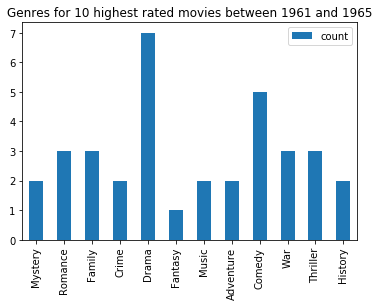

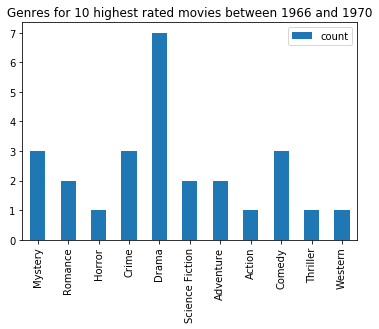

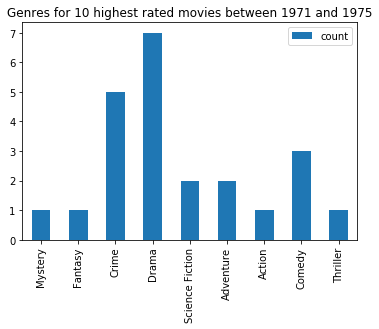

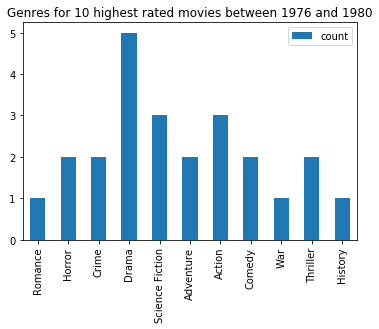

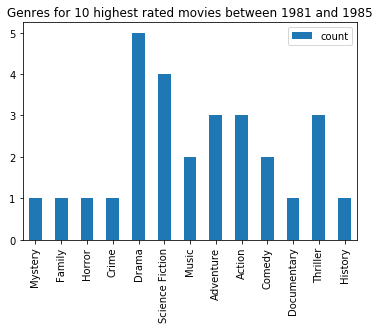

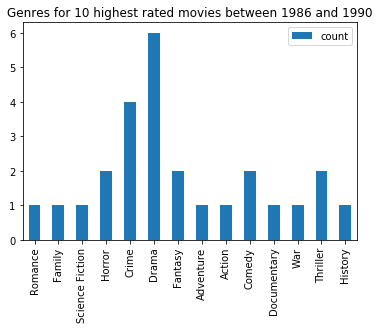

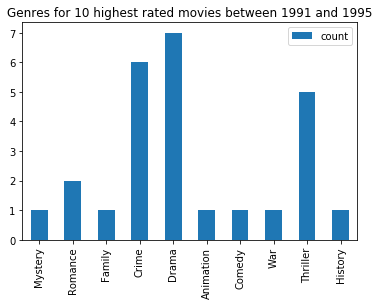

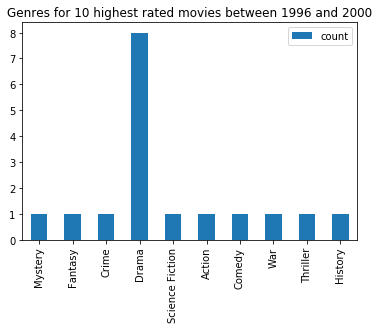

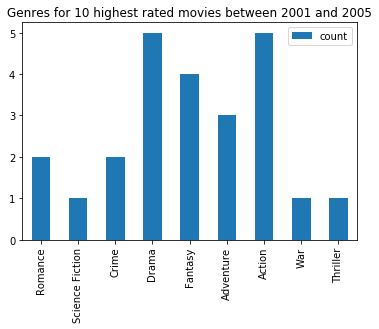

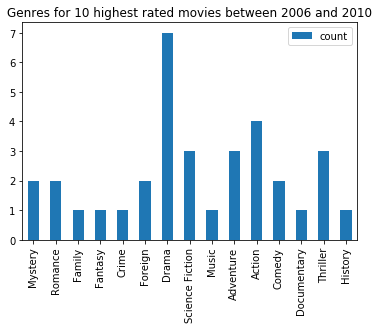

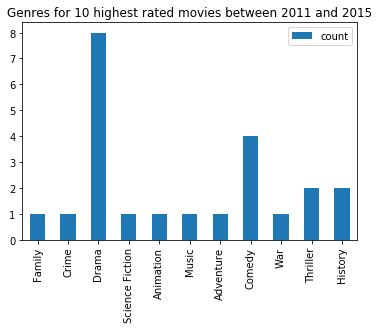

In [118]:
# min_yr = np.min(tmdb_df['release_year']) gives 1960
# max_yr = np.max(tmdb_df['release_year']) gives 2015
# we have data ranging from 1960 to 2015

# First we group the data in 5 year buckets, e.g. 1960-1965, 1966-1970 and so on.
stripped_df = tmdb_df.groupby(pd.cut(tmdb_df["release_year"], \
                np.arange(1960, 2020, 5)), as_index=False).apply(pd.DataFrame.sort_values, 'vote_average')

# We remove columns that won't help us in this analysis
stripped_df = stripped_df.drop(columns=['popularity', 'budget', 'revenue', 'original_title'])

def print_top_genre_over_time(data):
    # Iterate over each group based on index
    for i in xrange(11):       
        # We keep only the top 10 rated movie for each bucket.
        genre_list_over_yrs = data.loc[i].tail(10)['genres'].values
        
        final_list = []
        for elem in genre_list_over_yrs:
            try:
                final_list += elem
            except TypeError:
                pass  
        count_dict = Counter( final_list )

        min_yr_for_grp = np.min(data.loc[i]['release_year'].values)
        max_yr_for_grp = np.max(data.loc[i]['release_year'].values) 
        new_df = pd.DataFrame.from_dict(count_dict, orient='index')
        new_df = new_df.rename(columns={'index':'genre', 0:'count'})

        title_name = 'Genres for 10 highest rated movies between {} and {}'.format(min_yr_for_grp, max_yr_for_grp)
        # Plot the distribution of genres of 10 highest rated movies in each bucket
        plot = new_df.plot(kind='bar', title=title_name)
        print '\n'

print_top_genre_over_time(stripped_df)

#### Analysis
Looks like *drama* is the most popular of all genres, followed by *comedy*, *action* and *crime*, spanned across 1960 to 2015. The genres in the next level of popularity are *science-fiction*, *adventure* and *thriller*. This last level of genres are not consistently present in all 5 year buckets, because apparently good movies in these genres are not that frequent.

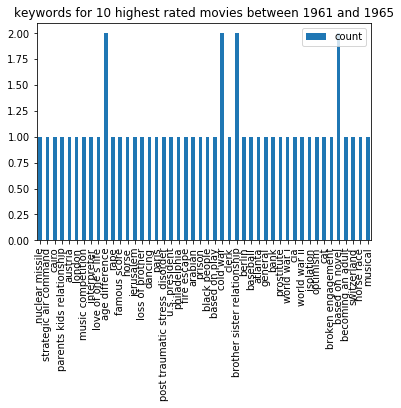

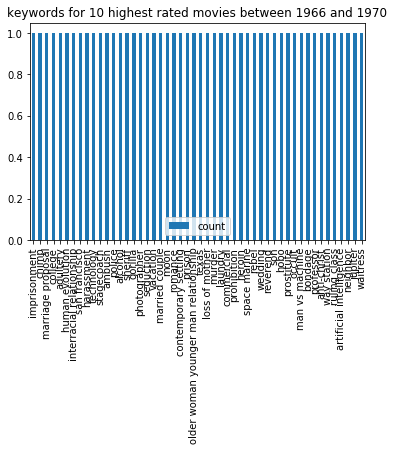

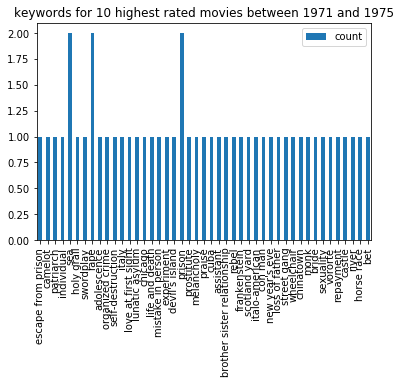

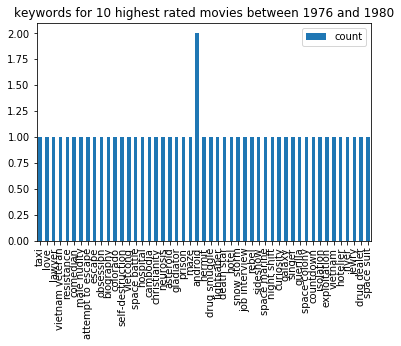

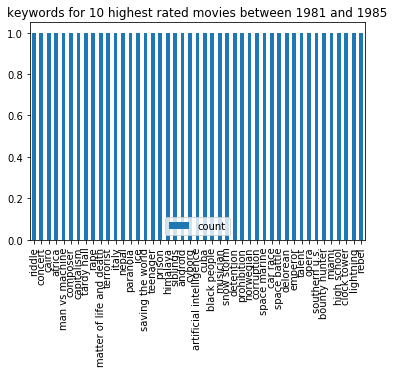

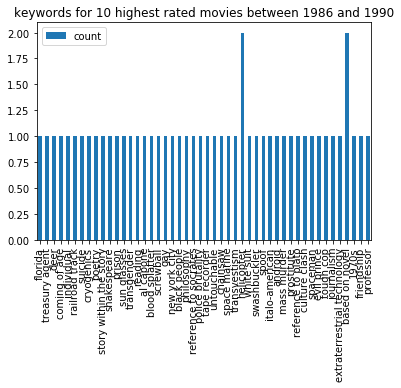

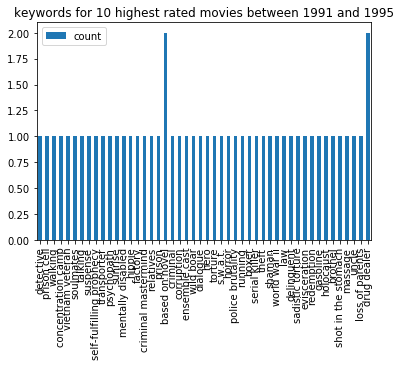

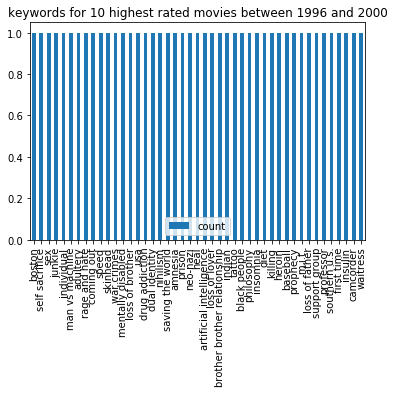

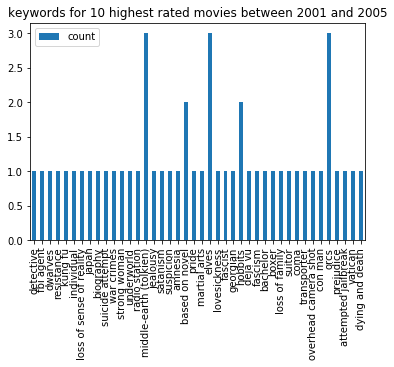

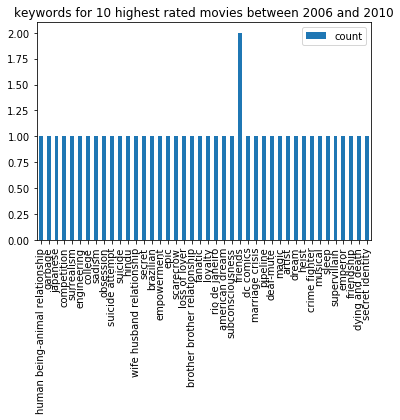

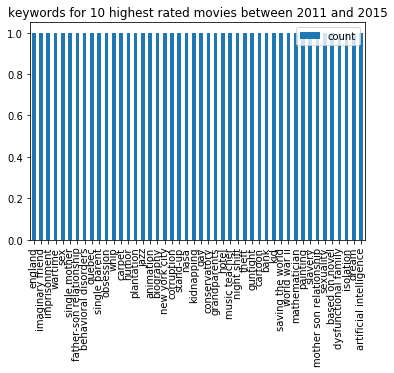

In [119]:
# Similar to the previous method, print the distribution of keywords
# used in 10 highest rated movies in each 5-year bucket
def print_top_keywords_over_time(data):
    for i in xrange(11):       
        keywords_list_over_yrs = data.loc[i].tail(10)['keywords'].values
                
        final_list = []
        for elem in keywords_list_over_yrs:  
            try:
                final_list += elem
            except TypeError:
                pass
        count_dict = Counter( final_list )
        
        min_yr_for_grp = np.min(data.loc[i]['release_year'].values)
        max_yr_for_grp = np.max(data.loc[i]['release_year'].values) 
        new_df = pd.DataFrame.from_dict(count_dict, orient='index')
        new_df = new_df.rename(columns={'index':'keywords', 0:'count'})
        title_name = 'keywords for 10 highest rated movies between {} and {}'.format(min_yr_for_grp, max_yr_for_grp)
        plot = new_df.plot(kind='bar', title=title_name)
        print '\n'

print_top_keywords_over_time(stripped_df)

#### Analysis
The keywords don't provide us with much information because of their (mostly) uniform distribution. This is because they are highly specific to the movie, and are not shared across movies.

### Research Question 4  
#### Considering the top 10 highest rated movies collected across every 5 years (total 50 movies), which production companies are the most consistent? Also, which production companies have produced most number of popular movies across the years, considering all the 50 movies mentioned above? List out the top 10 among these companies.
Similar to previous question we prepare the buckets. But this time we're going to look at the production companies behind the most popular movies, over time. We're also going to look at the top 10 production houses who've produced most number of highest rated movies.

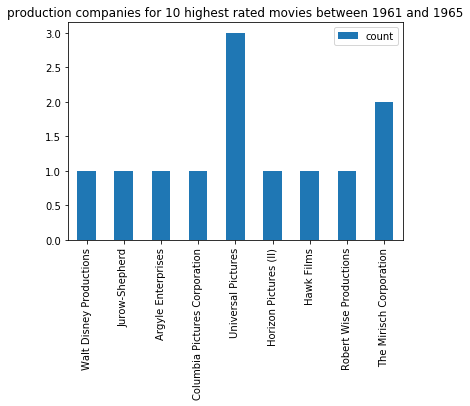

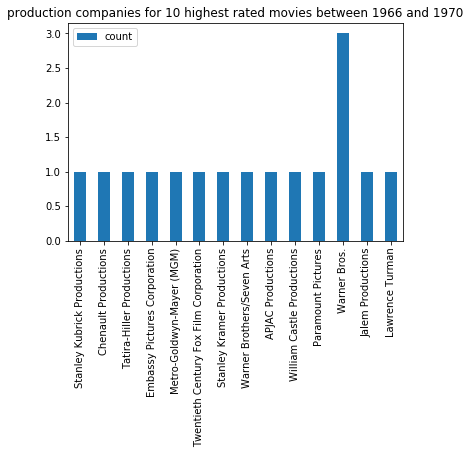

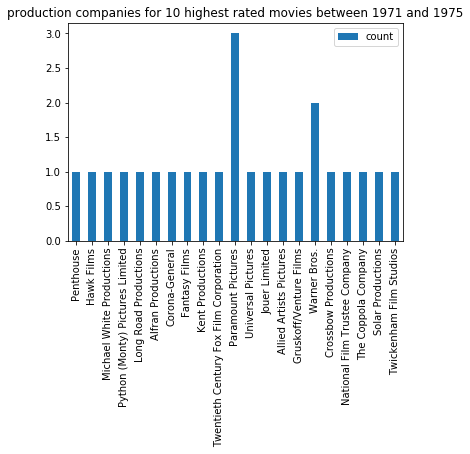

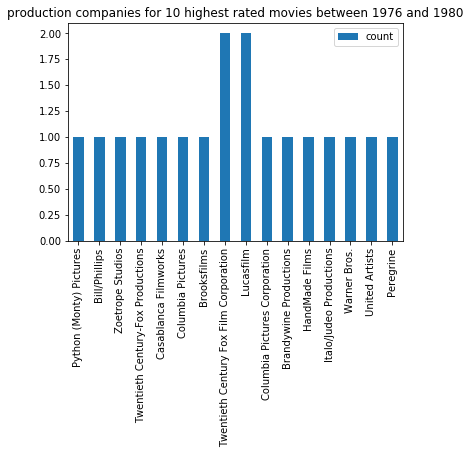

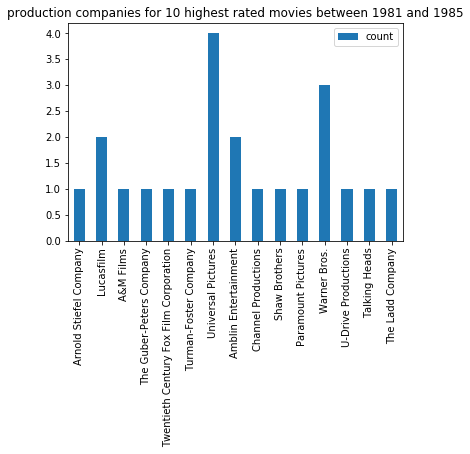

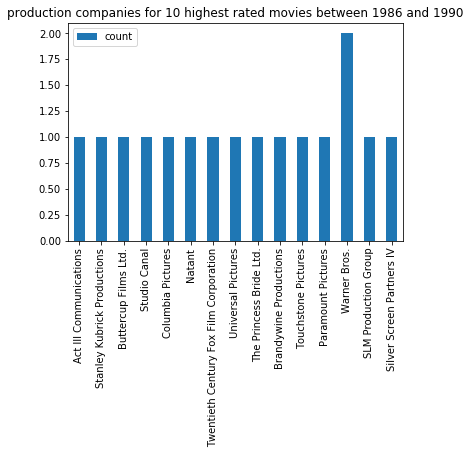

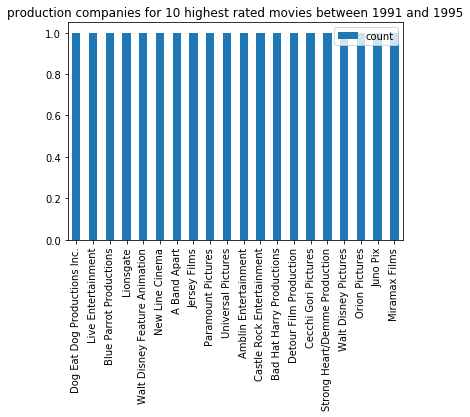

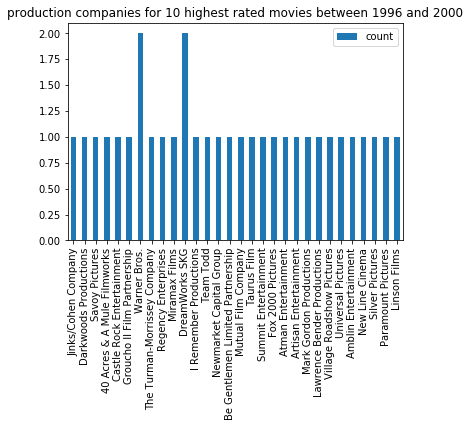

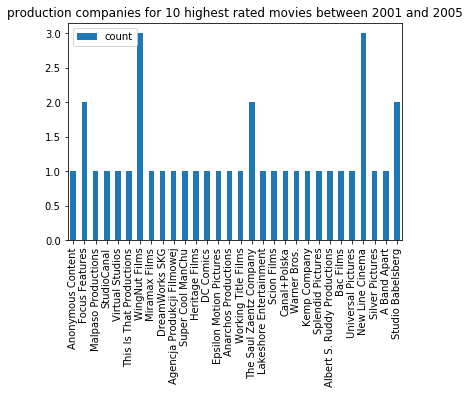

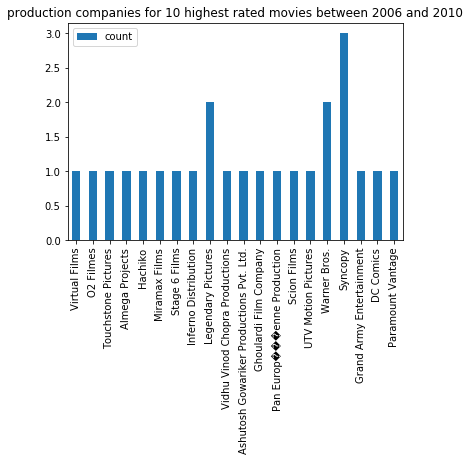

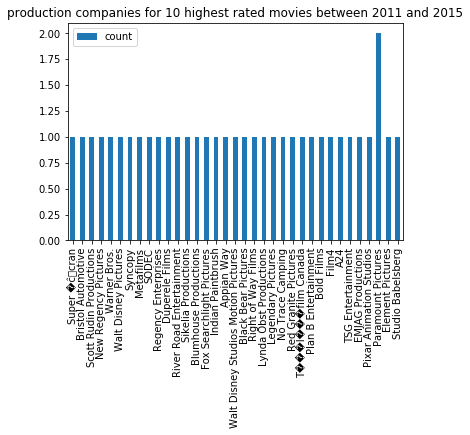

In [120]:
# Prints distribution of Production-companies which funded 
# the 10 highest rated movies, collected in 5-year buckets.
def print_top_prod_comps_over_time(data):
    for i in xrange(11):       
        prod_comps_list_over_yrs = data.loc[i].tail(10)['production_companies'].values
                
        final_list = []
        for elem in prod_comps_list_over_yrs:  
            try:
                final_list += elem
            except TypeError:
                pass
        count_dict = Counter( final_list )
        
        min_yr_for_grp = np.min(data.loc[i]['release_year'].values)
        max_yr_for_grp = np.max(data.loc[i]['release_year'].values) 
        new_df = pd.DataFrame.from_dict(count_dict, orient='index')
        new_df = new_df.rename(columns={'index':'production_companies', 0:'count'})
        title_name = 'production companies for 10 highest rated movies between {} and {}'.format(min_yr_for_grp, max_yr_for_grp)
        plot = new_df.plot(kind='bar', title=title_name)
        print '\n'

print_top_prod_comps_over_time(stripped_df)

#### Analysis
We can see, *Warner Bros* have produced the highest number of entries, in these lists, thus being the most consistent. They are followed by *Paramount Pictures*, *Universal Pictures* and *LucasFilm*.

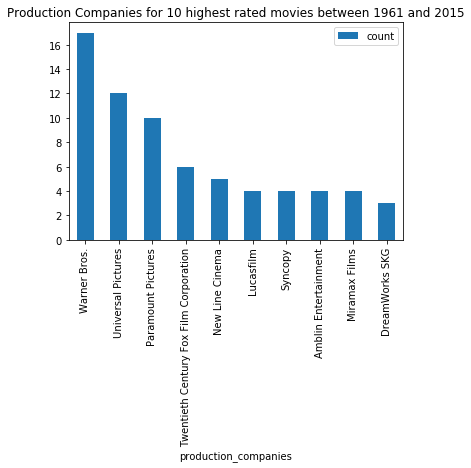

In [121]:
# We collect top rated 10 movies for each five years, and them put all of those in a bucket,
# to have a collection of 50 movies. We calculate which production houses have produced
# most number of highest rated movies
def print_top_prod_comp_of_all_time(data):
    final_list = []
    for i in xrange(11):       
        prod_comp_list_over_yrs = data.loc[i].tail(10)['production_companies'].values
                
        for elem in prod_comp_list_over_yrs:  
            try:
                final_list += elem
            except TypeError:
                pass
            
    count_dict = Counter( final_list )
    # print count_dict.most_common(10)
    top_count_list = count_dict.most_common(10)

    min_yr = np.min(data['release_year'].values)
    max_yr = np.max(data['release_year'].values) 
    new_df = pd.DataFrame(top_count_list, columns=['production_companies', 'count'])
    new_df = new_df.set_index('production_companies')
    title_name = 'Production Companies for 10 highest rated movies between {} and {}'.format(min_yr, max_yr)
    plot = new_df.plot(kind='bar', title=title_name)
    print '\n'

print_top_prod_comp_of_all_time(stripped_df)


#### Analysis
As expected, *Warner Bros* top the list. The houses that follow, most of them have been seen in the previous charts.

### Research Question 5  
#### Who are the most common actor(s)/actress(es)/directors across the 25 highest grossing movies of all time? What about the most common production companies? Which genres do most of them belong to? Do most of these movies share same release month?
This premise of the question is self-explanatory. The idea is to get some idea, about what might be influencing the revenue of the highest grossing movies.

Top 25 movies of all time based on revenue
         revenue                                 original_title
1386  2781505847                                         Avatar
3     2068178225                   Star Wars: The Force Awakens
5231  1845034188                                        Titanic
4361  1519557910                                   The Avengers
0     1513528810                                 Jurassic World
4     1506249360                                      Furious 7
14    1405035767                        Avengers: Age of Ultron
3374  1327817822   Harry Potter and the Deathly Hallows: Part 2
5422  1274219009                                         Frozen
5425  1215439994                                     Iron Man 3
8     1156730962                                        Minions
3522  1123746996                 Transformers: Dark of the Moon
4949  1118888979  The Lord of the Rings: The Return of the King
4365  1108561013                                        Skyfa

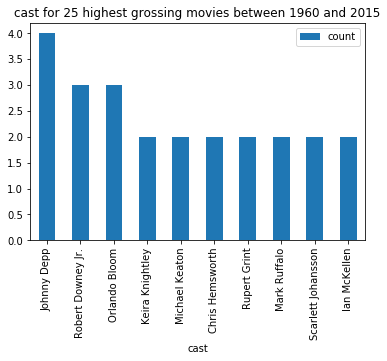

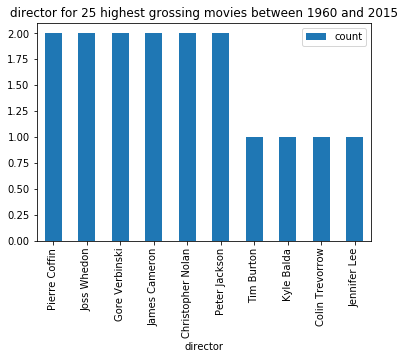

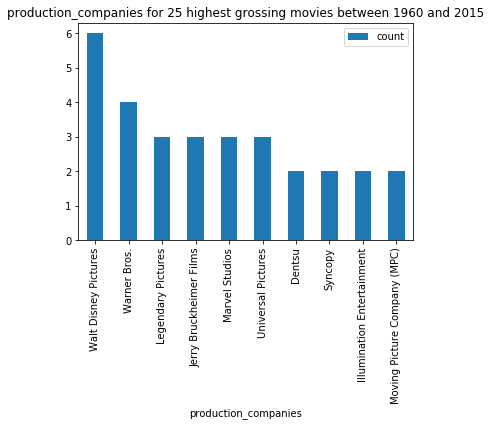

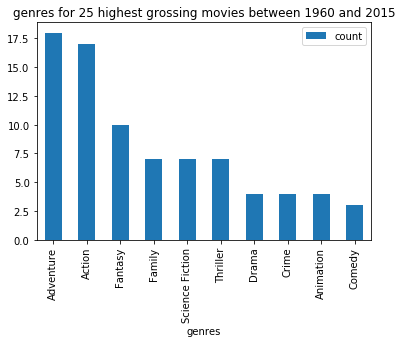

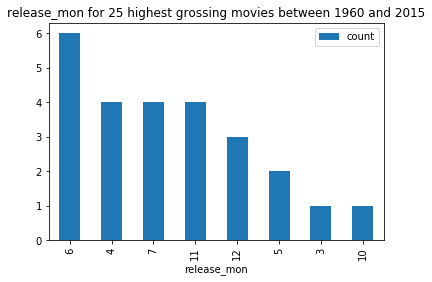

In [122]:
def print_top_movies_of_all_time(data, top_criteria, num_elems_to_keep):
    temp_df = data.sort_values([top_criteria], ascending=[False])
    temp_df = temp_df.head(num_elems_to_keep)
    print 'Top {} movies of all time based on {}'.format(num_elems_to_keep, top_criteria)
    print temp_df.iloc[:, [2, 3]]
    
def print_top_elem_of_all_time(data, top_criteria, elem_name, num_elems_to_keep):
    temp_df = data.sort_values([top_criteria], ascending=[False])
    temp_df = temp_df.head(num_elems_to_keep)
    # print temp_df
    
    final_list = []
    if elem_name == 'release_mon':
        final_list.extend(temp_df[elem_name].values)
    else:
        for elem in temp_df[elem_name].values:   
            try:
                final_list += elem
            except TypeError:
                pass
    
    count_dict = Counter( final_list )
    
    top_count_list = count_dict.most_common(10)
    min_yr = np.min(data['release_year'].values)
    max_yr = np.max(data['release_year'].values) 
    new_df = pd.DataFrame(top_count_list, columns=[elem_name, 'count'])
    new_df = new_df.set_index(elem_name)
    title_name = '{} for {} highest grossing movies between {} and {}'.format(elem_name, num_elems_to_keep, min_yr, max_yr)
    plot = new_df.plot(kind='bar', title=title_name)
    print '\n'

print_top_movies_of_all_time(tmdb_df, 'revenue', 25)
print_top_elem_of_all_time(tmdb_df, 'revenue', 'cast', 25)
print_top_elem_of_all_time(tmdb_df, 'revenue', 'director', 25)
print_top_elem_of_all_time(tmdb_df, 'revenue', 'production_companies', 25)
print_top_elem_of_all_time(tmdb_df, 'revenue', 'genres', 25)
print_top_elem_of_all_time(tmdb_df, 'revenue', 'release_mon', 25)

#### Analysis
1. Johnny Dep Takes the position of the actor who is part of the most of the highest grossing movies of all time. This comes as a perk of his *famous* roles in *Pirates of the Caribbean* franchise. Robert Downey Jr. takes the second place, because of his roll as Iron Man in Marvel movies. Orlando Bloom, who is present in the third position in this list, played his part in Pirates movies, as well as in Tolkien's fantasy movies. Out of these top 10 people, only 2 are women, rest are men.
2. The list of directors taking top positions also share the same traits as that of the top actors.
3. Disney takes the lead for the production company behind the highest grossing movies. This is not a surprise, as the *Pirates of the Caribbean* franchise, and some of the animation movies in the list are produced by Disney. Inclusion of other top entries in the list can be linked back to their respective franchises.
4. *Adventure*, *Action* and *Fantasy* take the top three places for genres.
5. Most of these movies have been released in June, while the place of next frequent month is shared by April, July and November. As the Movies have most of the audiences in US, this might be affected by the holiday seasons. By I'm not too sure about it, because of my lack of knowledge in US holidays.

### Research Question 6  
#### In what ranges do the running time of the 25 highest grossing movies of all time lie? How about the same metric measured across 25 highest rated movies?
We try to see, if the movie duration fall in a range for the most popular/financially successful movies. This might influence movie-makers to time-bound their movies.

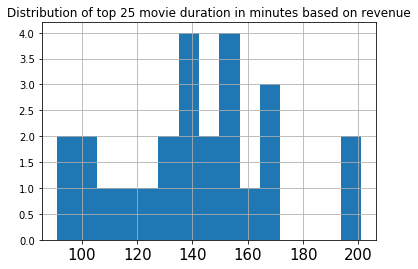

In [123]:
def print_top_runtime_of_all_time(data, top_criteria, elem_name, num_elems_to_keep):
    temp_df = data.sort_values([top_criteria], ascending=[False])
    temp_df = temp_df.head(num_elems_to_keep)
    # print temp_df
    temp_df[elem_name].hist(xlabelsize=15, bins=15)
    plt.title('Distribution of top 25 movie duration in minutes based on {}'.format(top_criteria))
    print '\n'
    
print_top_runtime_of_all_time(tmdb_df, 'revenue', 'runtime', 25)

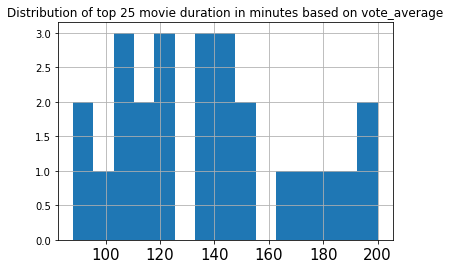

In [124]:
print_top_runtime_of_all_time(tmdb_df, 'vote_average', 'runtime', 25)

#### Analysis
1. If we take top 25 highest grossing movies, we see two peaks for the running time, one at around 140 min, and one at around 150 min region.
2. If we take top 25 highest rated movies, the pictures is a little different as there are 4 peaks, as seen in the second diagram above.

But it's evident, that viewers prefer movies which are not longer than 160 min in general.

### Research Question 7  
#### How do the mean budget and revenue change over time (measured every 5 years) for the top 10 highest grossing movies?
This will give us a good idea about how much production houses spent on the most financially successsful movies, and how much they have earned from it. As we plot it over several years, we'll also get to know the nature of change over time.

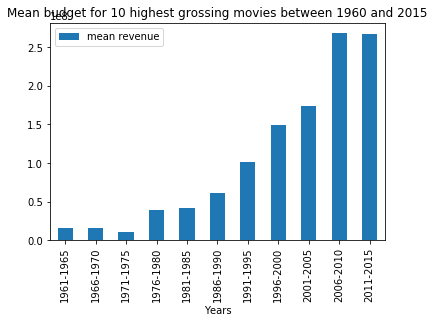

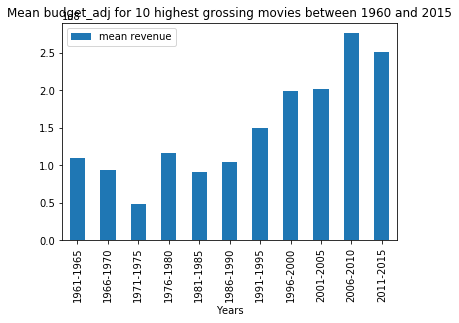

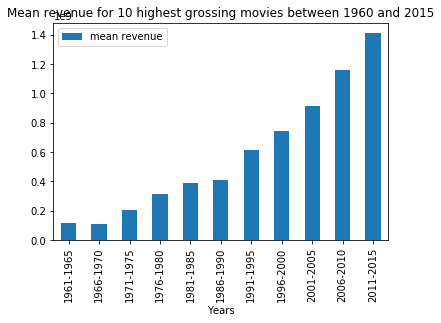

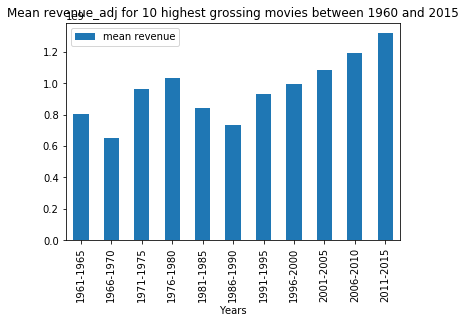

In [125]:
def prepare_df(data, field):
    temp_df = data.groupby(pd.cut(data["release_year"], \
            np.arange(1960, 2020, 5)), as_index=False).apply(pd.DataFrame.sort_values, field)
    temp_df = temp_df.drop(columns=['popularity', 'original_title'])
    return temp_df

def print_category_trend_over_time(data, field):    
    data = prepare_df(data, field)
    final_list = []
    for i in xrange(11):       
        top_rev_over_yrs = data.loc[i].tail(10)[field].values
        val = int(top_rev_over_yrs.mean())

        min_yr_for_grp = np.min(data.loc[i]['release_year'].values)
        max_yr_for_grp = np.max(data.loc[i]['release_year'].values) 
        label = '{}-{}'.format(min_yr_for_grp, max_yr_for_grp)
        tup = (label, val)
        final_list.append(tup)

    # print final_list
    new_df = pd.DataFrame(final_list, columns=['Years', 'mean revenue'])
    new_df = new_df.set_index('Years')
    title_name = 'Mean {} for 10 highest grossing movies between 1960 and 2015'.format(field)
    plot = new_df.plot(kind='bar', title=title_name)
    print '\n'

print_category_trend_over_time(tmdb_df, 'budget')
print_category_trend_over_time(tmdb_df, 'budget_adj')
print_category_trend_over_time(tmdb_df, 'revenue')
print_category_trend_over_time(tmdb_df, 'revenue_adj')

#### Analysis
As expected, we see that more and more money has been spent on and earned from the highest grossing movies, over time. It's evident from the first and third graph. The second and fourth graph point out an interesting behaviour. They point out that the inflation adjusted budget/revenue to be increasing (in general) over time, that means the average budget/revenue associated to these movies has enjoyed a superlinear growth, which is hinted by the first and third graph.

# <a id='conclusions'></a>
## Conclusions
We have found quite a few insights from this movie database. To summerize:

1. We've seen how popularity doesn't ensure a greater revenue growth in general, and vice versa. 
2. People mostly like movies, which have drama, comedy, action and crime in their plots.
3. We saw Warner Bros has produced the highest number of top-rated movies, followed by Universal Pictures, Paramount Pictures and 20th Century Fox.
4. When looking at the highest grossing movies of all time, Disney tops the list, kudos to their fantasy/action movies. In fact most of these top entries got their places from *Adventure*, *Action* and *Fantasy* genres. This again reinforces point no. 1. Maybe, the ratings of highest grossing movies normalize over time, thus reducing their average rating. But this is just a hypethesis, not a conclusion.
5. Audience mostly prefer movies which are not longer than 160 min.
6. The average revenue from highest grossing movies have seen a superlinear growth over time.

#### Limitations:
1. We don't know how the popularity of the movies were calculated, which prevented us from deriving any insights from it.
2. Some movies have budget/revenue set as zero. This seems unrealistic, so we dropped the records. Even if we used some normalized values (mean or median) replacing the zero values, it might have skewed the results in many scenarios (e.g. if the actual budget/revenue were among the top few).
3. We only have the total revenue for the movies, accumulated across the globe. We could've found more information (e.g. popularity against specific countries) if it was segregated by countries.
4. Even though we found some correlation between different parameters, we could not derive causation from it.

#### Future Work:
1. In future, we can try plotting the distributions of various parameters (e.g. revenue/budget from movies from a year, avg length of movies in a year etc.). This would help us knowing in which range most of the values lie.